In [1]:
##Ab hier einzeln nacheinander ausführen
!pip install pandas
import pandas as pd
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt ## Vorraussetzung für PDF Ausgabe

In [2]:
## Fenster nach Bestätigung

def Fenster2(data): 
    def button_click(column_name):
        print(f"Button für Spalte {column_name} wurde geklickt")
    def checkbox_clicked(column_name):
        if variable.get() == 1:
            print(f"Checkbutton{column_name} ist ausgewählt")
        else:
            print(f"Checkbutton{column_name} ist nicht ausgewählt")
    Spaltennamen =data.columns.tolist()
    print(Spaltennamen)
    root = tk.Tk()
    root.title("Spalten auswählen für GEODaten")
    for col in data.columns:#Quelle ChatGPT
        button = tk.Checkbutton(root, text=col, command=lambda col=col:checkbox_clicked(col)) ##lambda bindet col wöhrend allen schleifeniterationen
        button.pack()

In [ ]:
##Ab hier einzeln nacheinander ausführen
#GUI zum hochladen einer Datei
#import tkinter as tk
#from tkinter import filedialog
global file_path

def upload_file():
    global file_path
    file_path = filedialog.askopenfilename(filetypes=[("Excel Files", "*.xlsx;*.xls")])  # Öffnet ein Dateiauswahlfenster mit den Vorgaben Excelfiles auswählen zu können
    if file_path:  # Überprüfen, ob eine Datei ausgewählt wurde
        # Hier kannst du den Dateipfad verwenden, um die Datei zu öffnen oder andere Operationen durchzuführen
        
        print(f"Die ausgewählte Datei ist: {file_path}")
        labelAusgewählteDatei.config(text=f"Die ausgewählte Datei ist {file_path}")
        
def bestätigen():        
    global data
    data = pd.read_excel(file_path)
    root.destroy()
    Fenster2(data)
    
    
root = tk.Tk()
root.title("Datei hochladen")

# Erstelle ein Label
labelAusgewählteDatei = tk.Label(root, text="keine Datei ausgewählt")
labelAusgewählteDatei.pack()

# Erstelle Button
upload_button = tk.Button(root, text="Datei hochladen", command=upload_file)
upload_button.pack()

Bestätigungsbutton = tk.Button(root, text="Bestätigen", command=bestätigen)
Bestätigungsbutton.pack()

root.mainloop()

In [5]:
## Fenster nach Bestätigung

#def Fenster2(data): 
    #def button_click(column_name):
       # print(f"Button für Spalte {column_name} wurde geklickt")
   # def checkbox_clicked(column_name):
        #if variable.get() == 1:
           # print(f"Checkbutton{column_name} ist ausgewählt")
       #else:
            #print(f"Checkbutton{column_name} ist nicht ausgewählt")
    #Spaltennamen =data.columns.tolist()
    #print(Spaltennamen)
    #root = tk.Tk()
    #root.title("Spalten auswählen für GEODaten")
    #for col in data.columns:#Quelle ChatGPT
        #button = tk.Checkbutton(root, text=col, command=lambda col=col:checkbox_clicked(col)) ##lambda bindet col wöhrend allen schleifeniterationen
       # button.pack()

In [ ]:
#!pip install pandas
!pip install geopy
!pip install folium

if file_path is not None:
    root.destroy

#import pandas as pd
from geopy.geocoders import Nominatim
import folium
from geopy.distance import geodesic #Iport für Entfernungsberechnung

def get_user_input():
    city = PLZ#input("Gib die Stadt ein: ")
    radius = Umkreis# float(input("Gib den Umkreisradius in Kilometern ein: "))
    return city, radius

def filter_addresses_by_radius(df, center_coords, radius):
    
    filtered_addresses = [] #neuer Liste für gefilterte adresse
    
    for index, row in df.iterrows():
        coords = (row['Latitude'], row['Longitude'])
        if not any(pd.isna(coord) for coord in coords):## isna fragt nach keinen oder NaN Werten
            distance = geodesic(center_coords, coords).kilometers
            if distance <= radius:
                filtered_addresses.append(row['Address'])
    return filtered_addresses

##Dataframe aus Exceladatei
#file_path = 'Datenbank.xlsx'
data = pd.read_excel(file_path)
df = data.iloc[:80].copy() ##Die ersten 80 Elemente in df schreiben
print("läuft")
geolocator = Nominatim(user_agent="Exercises")

def get_geolocation(row):
    try:
        address = f"{row['Straße']}, {row['PLZ']}"
        location = geolocator.geocode(address)
        if location:
            return location.latitude, location.longitude, location.address
        else:
            return None, None, None
    except:
        return None, None, None

df[['Latitude', 'Longitude', 'Address']] = df.apply(get_geolocation, axis=1, result_type='expand')
print("beendet")

59425  300.0
Map saved to addresses_map.html
Filtered Addresses:
['Thälmannstraße, Sömmerda, Landkreis Sömmerda, Thüringen, 99610, Deutschland', 'Maxim-Gorki-Straße, Elxleben an der Gera, Elxleben, Landkreis Sömmerda, Thüringen, 99189, Deutschland', 'Dossenheimer Landstraße, Handschuhsheim, Heidelberg, Baden-Württemberg, 69121, Deutschland', 'Alte Eppelheimer Straße, Bergheim, Heidelberg, Baden-Württemberg, 69115, Deutschland', 'Rohrbacher Straße, Weststadt, Heidelberg, Baden-Württemberg, 69115, Deutschland', 'Kurfürsten-Anlage, Bergheim, Heidelberg, Baden-Württemberg, 69115, Deutschland', 'Kranichweg, Pfaffengrund, Heidelberg, Baden-Württemberg, 69123, Deutschland', 'Langer Anger, Bahnstadt, Heidelberg, Baden-Württemberg, 69115, Deutschland', 'Am Taubenfeld, Wieblingen, Heidelberg, Baden-Württemberg, 69123, Deutschland', 'Im Schaffner, Pfaffengrund, Heidelberg, Baden-Württemberg, 69123, Deutschland', 'Plöck, Altstadt, Heidelberg, Baden-Württemberg, 69117, Deutschland', 'Michelinstraße

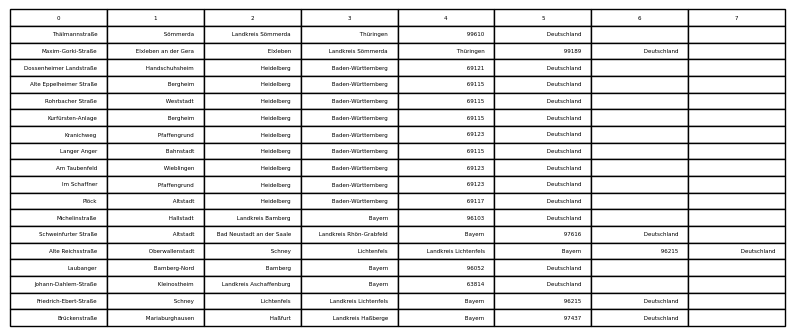

In [ ]:
## Gui für Eingabe der Adresse und des Umkreises
Str ="test"
PLZ ="test"
Umkreis="Test"
global framedistance
Initdf = {'A': [1, 2, 3], 'B': [4, 5, 6]}
framedistance=pd.DataFrame(Initdf)
def Test123(Str, PLZ, Umkreis):
    print(Str, PLZ, Umkreis)
    # Get user input for city and radius
    city, radius = get_user_input()
    global filtered_addresses
    # Get coordinates of the specified city
    city_location = geolocator.geocode(city)
    if city_location:
        center_coords = (city_location.latitude, city_location.longitude)

        # Filter addresses within the specified radius
        filtered_addresses = filter_addresses_by_radius(df, center_coords, radius)

        # Display addresses in OpenStreetMap using folium
        my_map = folium.Map(location=center_coords, zoom_start=6)

        for index, row in df.iterrows():
            coords = (row['Latitude'], row['Longitude'])
            if not any(pd.isna(coord) for coord in coords):
                distance = geodesic(center_coords, coords).kilometers
                if distance <= radius:
                    folium.Marker(
                        location=[row['Latitude'], row['Longitude']],
                        popup=row['Address'],
                        icon=folium.Icon(color="blue")
                    ).add_to(my_map)
                   
        # Save the map to an HTML file or display it in a Jupyter Notebook
        map_file_path = "addresses_map.html"
        my_map.save(map_file_path)
        print(f"Map saved to {map_file_path}")

        # Print the DataFrame with Geolocation information
        print("Filtered Addresses:")
        print(filtered_addresses)
    else:
        print(f"Die Stadt {city} konnte nicht gefunden werden.")

def on_button_click():
    global Str
    Str = entry.get()
    global PLZ 
    PLZ = entry1.get()
    global Umkreis
    Umkreis = float(entryUmkreis.get())
    
    label.config(text=f"Eingegebene Straße: {Str}")
    label1.config(text=f"Eingegebene PLZ: {PLZ}")
    labelUmkreis.config(text=f"Eingegebener Umkreis: {Umkreis}")
    
    Test123(PLZ, Str, Umkreis)
# Erstelle das Hauptfenster
root = tk.Tk()
root.title("Eingabefeld Beispiel")

# Erstelle ein Label
label = tk.Label(root, text="Gib eine Straße ein:")
label.pack()

# Erstelle ein Eingabefeld
entry = tk.Entry(root)
entry.pack()
label1 =tk.Label(root, text="Gib eine PLZ ein:")
label1.pack()
entry1 = tk.Entry(root)
entry1.pack()

labelUmkreis =tk.Label(root, text="Umkreis der angezeigt werden soll in km")
labelUmkreis.pack()
entryUmkreis = tk.Entry(root)
entryUmkreis.pack()

# Erstelle einen Button, der den eingegebenen Text ausgibt
button = tk.Button(root, text="Bestätigen", command=on_button_click)
button.pack(side ="left", padx=100, pady=100)

#Button für PDF
#button = tk.Button(root, text="PDF Drucken", command=pdfDrucken())
#button.pack(side ="left", padx=100, pady=100)



#PDF Erstellung (ChatGPT)# PDF Generierung Phillip
def pdfDrucken():
    SplitList=[item.split(',') for item in filtered_addresses]
    df_distance = pd.DataFrame(SplitList)
    print (df_distance)
    plt.figure(figsize=(10, 4))#definiert die Größe der Gesamtabbildung
    plt.table(cellText=df_distance.values, colLabels=df_distance.columns, loc='center')
    plt.axis('off')  # Deaktiviere die Achsen
    #plt.xlabel('X-Achse', fontsize=12)
    plt.savefig('pandas_dataframe.pdf')
    plt.show()
    
    
button = tk.Button(root, text="PDF Drucken", command=pdfDrucken)
button.pack(side ="left", padx=100, pady=100)
root.mainloop()

In [15]:
def Test123(Str, PLZ, Umkreis):
    print(Str, PLZ, Umkreis)
    # Get user input for city and radius
    city, radius = get_user_input()

    # Get coordinates of the specified city
    city_location = geolocator.geocode(city)
    if city_location:
        center_coords = (city_location.latitude, city_location.longitude)

        # Filter addresses within the specified radius
        filtered_addresses = filter_addresses_by_radius(df, center_coords, radius)

        # Display addresses in OpenStreetMap using folium
        my_map = folium.Map(location=center_coords, zoom_start=6)

        for index, row in df.iterrows():
            coords = (row['Latitude'], row['Longitude'])
            if not any(pd.isna(coord) for coord in coords):
                distance = geodesic(center_coords, coords).kilometers
                if distance <= radius:
                    folium.Marker(
                        location=[row['Latitude'], row['Longitude']],
                        popup=row['Address'],
                        icon=folium.Icon(color="blue")
                    ).add_to(my_map)
                    

        # Save the map to an HTML file or display it in a Jupyter Notebook
        map_file_path = "addresses_map.html"
        my_map.save(map_file_path)
        print(f"Map saved to {map_file_path}")

        # Print the DataFrame with Geolocation information
        print("Filtered Addresses:")
        print(filtered_addresses)
    else:
        print(f"Die Stadt {city} konnte nicht gefunden werden.")


OperationalError: no such table: df